In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
df = pd.read_csv('COMBINED_DATA_ALL_YEARS.csv', low_memory=False)

In [3]:
# Create a table with null values sorted by percentage
null_counts = df.isnull().sum()
null_percent = (df.isnull().sum() / df.shape[0]) * 100

# Create a DataFrame for better display
null_table = pd.DataFrame({
    'Null Count': null_counts,
    'Null Percentage': null_percent.round(2)
})

# Sort by null percentage in descending order for better readability
null_table = null_table.sort_values('Null Percentage', ascending=False)

# Display the table
display(null_table)

,Null Count,Null Percentage
ER_VISIT,2131534,99.96
X_STAY,2130473,99.91
BIRTH_DEFECT,2130515,99.91
RPT_DATE,2128286,99.81
V_FUNDBY,2127785,99.78
CAGE_MO,2079969,97.54
DATEDIED,2074440,97.28
DIED,2069522,97.05
L_THREAT,2060071,96.61
DISABLE,2049803,96.13


In [4]:
## columns which are having more than 90 percent of the null values in the data frame
col_90_null = ['ER_VISIT', 'X_STAY', 'BIRTH_DEFECT', 'RPT_DATE', 'V_FUNDBY', 'CAGE_MO', 'DATEDIED', 'DIED', 'L_THREAT' ,'DISABLE', 'PRIOR_VAX']


## columns having more than 50% and less than 90 percent of the null values in the dataframe

col_50_90_null = ['HOSPDAYS', 'HOSPITAL', 'ER_ED_VISIT', 'OFC_VISIT', 'CUR_ILL', 'SPLTTYPE', 'SYMPTOMVERSION5', 'SYMPTOM5', 'LAB_DATA', 'ALLERGIES', 'SYMPTOM4',
'SYMPTOMVERSION4']

## columns having 20% to 50% null values
col_20_50_null = ['OTHER_MEDS', 'HISTORY', 'SYMPTOMVERSION3', 'SYMPTOM3', 'VAX_SITE', 'VAX_LOT', 'VAX_ROUTE', 'SYMPTOMVERSION2', 'SYMPTOM2', 'CAGE_YR']

## columns having 1% to 20% null values
col_1_20_null = ['STATE', 'NUMDAYS', 'AGE_YRS', 'RECOVD', 'ONSET_DATE', 'VAX_DATE', 'TODAYS_DATE', 'VAX_DOSE_SERIES', 'SYMPTOM_TEXT', 'SEX']

In [5]:
df.head(5)

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,SYMPTOMVERSION5,ORDER_y,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,ORDER
0,810053,01/01/2020,OH,73.0,73.0,NaN,F,NaN,Extreme shivering for approx. 5 hours then fev...,NaN,...,22.1,2,FLU3,SANOFI PASTEUR,NaN,UNK,NaN,NaN,INFLUENZA (SEASONAL) (FLUZONE HIGH-DOSE),2
1,810053,01/01/2020,OH,73.0,73.0,NaN,F,NaN,Extreme shivering for approx. 5 hours then fev...,NaN,...,NaN,2,FLU3,SANOFI PASTEUR,NaN,UNK,NaN,NaN,INFLUENZA (SEASONAL) (FLUZONE HIGH-DOSE),2
2,855017,01/01/2020,HI,55.0,55.0,NaN,F,NaN,Symptoms occurred almost immediately- aching j...,NaN,...,NaN,1,VARZOS,GLAXOSMITHKLINE BIOLOGICALS,NaN,2,SYR,LA,ZOSTER (SHINGRIX),1
3,855018,01/01/2020,WI,68.0,68.0,NaN,F,NaN,"Extreme pain, muscle weakness in right arm so ...",NaN,...,22.1,1,UNK,UNKNOWN MANUFACTURER,NaN,1,IM,RA,VACCINE NOT SPECIFIED (OTHER),1
4,855018,01/01/2020,WI,68.0,68.0,NaN,F,NaN,"Extreme pain, muscle weakness in right arm so ...",NaN,...,22.1,1,UNK,UNKNOWN MANUFACTURER,NaN,1,IM,RA,VACCINE NOT SPECIFIED (OTHER),1


In [6]:
## column view of the 90 percent null values in the table


col_90_null = [
    'ER_VISIT', 'X_STAY', 'BIRTH_DEFECT', 'RPT_DATE', 
    'V_FUNDBY', 'CAGE_MO', 'DATEDIED', 'DIED', 
    'L_THREAT', 'DISABLE', 'PRIOR_VAX'
]

# Select only those columns
null90_df = df[col_90_null]

null90_df

,ER_VISIT,X_STAY,BIRTH_DEFECT,RPT_DATE,V_FUNDBY,CAGE_MO,DATEDIED,DIED,L_THREAT,DISABLE,PRIOR_VAX
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72; intense pain;12/7/18/Fluzone High-Dose/San...
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72; intense pain;12/7/18/Fluzone High-Dose/San...
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2132426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2132427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2132428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2132429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
## column view of the 50-90 percent null values in the table


col_50_90_null = ['HOSPDAYS', 'HOSPITAL', 'ER_ED_VISIT', 'OFC_VISIT', 'CUR_ILL', 'SPLTTYPE', 'SYMPTOMVERSION5', 'SYMPTOM5', 'LAB_DATA', 'ALLERGIES', 'SYMPTOM4',
'SYMPTOMVERSION4']
# Select only those columns
null50_90_df = df[col_50_90_null]

null50_90_df

,HOSPDAYS,HOSPITAL,ER_ED_VISIT,OFC_VISIT,CUR_ILL,SPLTTYPE,SYMPTOMVERSION5,SYMPTOM5,LAB_DATA,ALLERGIES,SYMPTOM4,SYMPTOMVERSION4
0,NaN,NaN,NaN,NaN,None I was aware of,NaN,22.1,Insomnia,None. Did know know if the adverse events wer...,Latex,Heart rate increased,22.1
1,NaN,NaN,NaN,NaN,None I was aware of,NaN,NaN,NaN,None. Did know know if the adverse events wer...,Latex,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Morphine,Pyrexia,22.1
3,NaN,NaN,Y,Y,NaN,NaN,22.1,Injected limb mobility decreased,Same day 12/30/2019. No tests other than routi...,"Penicillin, sulfa drugs, erythromycin, tetracy...",Hypoaesthesia,22.1
4,NaN,NaN,Y,Y,NaN,NaN,22.1,Vertigo,Same day 12/30/2019. No tests other than routi...,"Penicillin, sulfa drugs, erythromycin, tetracy...",Tremor,22.1
...,...,...,...,...,...,...,...,...,...,...,...,...
2132426,NaN,NaN,NaN,NaN,NaN,"USNovavax, Inc2025NVXUS00",NaN,NaN,NaN,NaN,NaN,NaN
2132427,NaN,NaN,NaN,NaN,Allergy to chemicals NOS,"USNovavax, Inc2025NVXUS00",NaN,NaN,NaN,NaN,NaN,NaN
2132428,NaN,NaN,NaN,NaN,NaN,"USNovavax, Inc2025NVXUS00",NaN,NaN,NaN,NaN,NaN,NaN
2132429,NaN,NaN,NaN,NaN,NaN,USGSKUS2025AMR094015,28.0,Vaccination failure,NaN,NaN,Stress,28.0


In [8]:
## column view of the 20-50 percent null values in the table


col_20_50_null = ['OTHER_MEDS', 'HISTORY', 'SYMPTOMVERSION3', 'SYMPTOM3', 'VAX_SITE', 'VAX_LOT', 'VAX_ROUTE', 'SYMPTOMVERSION2', 'SYMPTOM2', 'CAGE_YR']

# Select only those columns
null20_50_df = df[col_20_50_null]

null20_50_df

,OTHER_MEDS,HISTORY,SYMPTOMVERSION3,SYMPTOM3,VAX_SITE,VAX_LOT,VAX_ROUTE,SYMPTOMVERSION2,SYMPTOM2,CAGE_YR
0,"Ovicite eye vitamins, vitamin D, vitamin C, Tu...",fibromyalgia; arthritis,22.1,Headache,NaN,NaN,NaN,22.1,Chills,73.0
1,"Ovicite eye vitamins, vitamin D, vitamin C, Tu...",fibromyalgia; arthritis,NaN,NaN,NaN,NaN,NaN,22.1,Pyrexia,73.0
2,Loristan,Migraines,22.1,Injection site pain,LA,NaN,SYR,22.1,Chills,55.0
3,"levothyroxine, multi vitamin, calcium.","Hypothyroidism, Meniere's Disease.",22.1,Hypertension,RA,NaN,IM,22.1,Fatigue,68.0
4,"levothyroxine, multi vitamin, calcium.","Hypothyroidism, Meniere's Disease.",22.1,Pyrexia,RA,NaN,IM,22.1,Pain in extremity,68.0
...,...,...,...,...,...,...,...,...,...,...
2132426,NaN,NaN,NaN,NaN,NaN,NaN,OT,28.0,Off label use,NaN
2132427,NaN,NaN,NaN,NaN,NaN,NaN,OT,28.0,Off label use,NaN
2132428,NaN,NaN,NaN,NaN,NaN,NaN,OT,28.0,Off label use,NaN
2132429,NaN,NaN,28.0,Oral herpes zoster,NaN,UNK,NaN,28.0,Malaise,NaN


In [9]:
## column view of the 1-20 percent null values in the table


col_1_20_null = ['STATE', 'NUMDAYS', 'AGE_YRS', 'RECOVD', 'ONSET_DATE', 'VAX_DATE', 'TODAYS_DATE', 'VAX_DOSE_SERIES', 'SYMPTOM_TEXT', 'SEX']
# Select only those columns
null1_20_df = df[col_1_20_null]

null1_20_df

,STATE,NUMDAYS,AGE_YRS,RECOVD,ONSET_DATE,VAX_DATE,TODAYS_DATE,VAX_DOSE_SERIES,SYMPTOM_TEXT,SEX
0,OH,0.0,73.0,U,12/30/2019,12/30/2019,01/01/2020,UNK,Extreme shivering for approx. 5 hours then fev...,F
1,OH,0.0,73.0,U,12/30/2019,12/30/2019,01/01/2020,UNK,Extreme shivering for approx. 5 hours then fev...,F
2,HI,0.0,55.0,N,12/30/2019,12/30/2019,01/01/2020,2,Symptoms occurred almost immediately- aching j...,F
3,WI,0.0,68.0,Y,12/30/2019,12/30/2019,01/01/2020,1,"Extreme pain, muscle weakness in right arm so ...",F
4,WI,0.0,68.0,Y,12/30/2019,12/30/2019,01/01/2020,1,"Extreme pain, muscle weakness in right arm so ...",F
...,...,...,...,...,...,...,...,...,...,...
2132426,NY,NaN,NaN,Y,NaN,NaN,07/24/2025,UNK,Daughter received the 2024-2025 Novavax vaccin...,F
2132427,NaN,0.0,NaN,Y,04/01/2025,04/01/2025,07/24/2025,UNK,"I got the one in the last batch in April, but ...",F
2132428,NY,NaN,NaN,Y,NaN,NaN,07/24/2025,UNK,"I got my last year only got the one dose, didn...",F
2132429,NaN,NaN,NaN,N,NaN,NaN,07/25/2025,UNK,Suspected vaccination failure; vertigo so bad ...,NaN


In [10]:
df.head().T

,0,1,2,3,4
VAERS_ID,810053,810053,855017,855018,855018
RECVDATE,01/01/2020,01/01/2020,01/01/2020,01/01/2020,01/01/2020
STATE,OH,OH,HI,WI,WI
AGE_YRS,73.0,73.0,55.0,68.0,68.0
CAGE_YR,73.0,73.0,55.0,68.0,68.0
CAGE_MO,NaN,NaN,NaN,NaN,NaN
SEX,F,F,F,F,F
RPT_DATE,NaN,NaN,NaN,NaN,NaN
SYMPTOM_TEXT,Extreme shivering for approx. 5 hours then fev...,Extreme shivering for approx. 5 hours then fev...,Symptoms occurred almost immediately- aching j...,"Extreme pain, muscle weakness in right arm so ...","Extreme pain, muscle weakness in right arm so ..."
DIED,NaN,NaN,NaN,NaN,NaN


In [11]:
df['ER_VISIT'].isnull().sum()

np.int64(2131534)

In [12]:
df.duplicated().sum()

np.int64(5218)

In [13]:

df_no_duplicates = df.drop_duplicates()
df = df.reset_index(drop=True)
df.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,SYMPTOMVERSION5,ORDER_y,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,ORDER
0,810053,01/01/2020,OH,73.0,73.0,NaN,F,NaN,Extreme shivering for approx. 5 hours then fev...,NaN,...,22.1,2,FLU3,SANOFI PASTEUR,NaN,UNK,NaN,NaN,INFLUENZA (SEASONAL) (FLUZONE HIGH-DOSE),2
1,810053,01/01/2020,OH,73.0,73.0,NaN,F,NaN,Extreme shivering for approx. 5 hours then fev...,NaN,...,NaN,2,FLU3,SANOFI PASTEUR,NaN,UNK,NaN,NaN,INFLUENZA (SEASONAL) (FLUZONE HIGH-DOSE),2
2,855017,01/01/2020,HI,55.0,55.0,NaN,F,NaN,Symptoms occurred almost immediately- aching j...,NaN,...,NaN,1,VARZOS,GLAXOSMITHKLINE BIOLOGICALS,NaN,2,SYR,LA,ZOSTER (SHINGRIX),1
3,855018,01/01/2020,WI,68.0,68.0,NaN,F,NaN,"Extreme pain, muscle weakness in right arm so ...",NaN,...,22.1,1,UNK,UNKNOWN MANUFACTURER,NaN,1,IM,RA,VACCINE NOT SPECIFIED (OTHER),1
4,855018,01/01/2020,WI,68.0,68.0,NaN,F,NaN,"Extreme pain, muscle weakness in right arm so ...",NaN,...,22.1,1,UNK,UNKNOWN MANUFACTURER,NaN,1,IM,RA,VACCINE NOT SPECIFIED (OTHER),1


In [14]:
df.duplicated().sum()

np.int64(5218)

In [18]:
new_df = df_no_duplicates

In [19]:
new_df.duplicated().sum()

np.int64(0)

In [20]:
new_df.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,SYMPTOMVERSION5,ORDER_y,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,ORDER
0,810053,01/01/2020,OH,73.0,73.0,NaN,F,NaN,Extreme shivering for approx. 5 hours then fev...,NaN,...,22.1,2,FLU3,SANOFI PASTEUR,NaN,UNK,NaN,NaN,INFLUENZA (SEASONAL) (FLUZONE HIGH-DOSE),2
1,810053,01/01/2020,OH,73.0,73.0,NaN,F,NaN,Extreme shivering for approx. 5 hours then fev...,NaN,...,NaN,2,FLU3,SANOFI PASTEUR,NaN,UNK,NaN,NaN,INFLUENZA (SEASONAL) (FLUZONE HIGH-DOSE),2
2,855017,01/01/2020,HI,55.0,55.0,NaN,F,NaN,Symptoms occurred almost immediately- aching j...,NaN,...,NaN,1,VARZOS,GLAXOSMITHKLINE BIOLOGICALS,NaN,2,SYR,LA,ZOSTER (SHINGRIX),1
3,855018,01/01/2020,WI,68.0,68.0,NaN,F,NaN,"Extreme pain, muscle weakness in right arm so ...",NaN,...,22.1,1,UNK,UNKNOWN MANUFACTURER,NaN,1,IM,RA,VACCINE NOT SPECIFIED (OTHER),1
4,855018,01/01/2020,WI,68.0,68.0,NaN,F,NaN,"Extreme pain, muscle weakness in right arm so ...",NaN,...,22.1,1,UNK,UNKNOWN MANUFACTURER,NaN,1,IM,RA,VACCINE NOT SPECIFIED (OTHER),1


In [21]:
new_df.shape

(2127213, 55)

In [ ]:
## columns which are having more than 90 percent of the null values in the data frame
col_90_null = ['ER_VISIT', 'X_STAY', 'BIRTH_DEFECT', 'RPT_DATE', 'V_FUNDBY', 'CAGE_MO', 'DATEDIED', 'DIED', 'L_THREAT' ,'DISABLE', 'PRIOR_VAX']


## columns having more than 50% and less than 90 percent of the null values in the dataframe

col_50_90_null = ['HOSPDAYS', 'HOSPITAL', 'ER_ED_VISIT', 'OFC_VISIT', 'CUR_ILL', 'SPLTTYPE', 'SYMPTOMVERSION5', 'SYMPTOM5', 'LAB_DATA', 'ALLERGIES', 'SYMPTOM4',
'SYMPTOMVERSION4']

## columns having 20% to 50% null values
col_20_50_null = ['OTHER_MEDS', 'HISTORY', 'SYMPTOMVERSION3', 'SYMPTOM3', 'VAX_SITE', 'VAX_LOT', 'VAX_ROUTE', 'SYMPTOMVERSION2', 'SYMPTOM2', 'CAGE_YR']

## columns having 1% to 20% null values
col_1_20_null = ['STATE', 'NUMDAYS', 'AGE_YRS', 'RECOVD', 'ONSET_DATE', 'VAX_DATE', 'TODAYS_DATE', 'VAX_DOSE_SERIES', 'SYMPTOM_TEXT', 'SEX']

In [46]:
keep_cols = ['VAERS_ID',
'STATE',
'AGE_YR',
'SEX',
'SYMPTOM_TEXT',
'RECOVD',
'VAX_DATE',
'onset_DAYS',
'num_DAYS',
'V_ADMINBY',
'HISTORY_FORM_VERS_ALLERGIES_ORDER',
'ORDER',
'SYMPTOM_1',
'SYMPTOM_2',
'SYMPTOM_VERSION_2',
'SYMPTOM_3',
'SYMPTOM_VERSION_3',
'VAX_TYP',
'VAX_MANU',
'VAX_LOT',
'VAX_DOSE_SERIES',
'VAX_ROUTE',
'VAX_SITE',
'VAX_NAME'
]

In [49]:
len(keep_cols)

24

In [47]:
existing_cols= new_df.columns.tolist()

In [48]:
to_know = []

for i in existing_cols:
    if i not in keep_cols:
        to_know.append(i)
print(len(to_know))
print(to_know)

29
['DIED', 'L_THREAT', 'DISABLE', 'HOSPITAL', 'HOSPDAYS', 'ER_ED_VISIT', 'SYMPTOM4', 'SYMPTOM5', 'CUR_ILL', 'ALLERGIES', 'LAB_DATA', 'SYMPTOMVERSION4', 'SYMPTOMVERSION5', 'OTHER_MEDS', 'HISTORY', 'SYMPTOMVERSION3', 'SYMPTOM3', 'SYMPTOMVERSION2', 'SYMPTOM2', 'CAGE_YR', 'NUMDAYS', 'AGE_YRS', 'ONSET_DATE', 'TODAYS_DATE', 'RECVDATE', 'FORM_VERS', 'SYMPTOMVERSION1', 'SYMPTOM1', 'VAX_TYPE']


In [55]:
new_df.head().T

,0,1,2,3,4
DIED,NaN,NaN,NaN,NaN,NaN
L_THREAT,NaN,NaN,NaN,NaN,NaN
DISABLE,NaN,NaN,NaN,NaN,NaN
HOSPITAL,NaN,NaN,NaN,NaN,NaN
HOSPDAYS,NaN,NaN,NaN,NaN,NaN
ER_ED_VISIT,NaN,NaN,NaN,Y,Y
SYMPTOM4,Heart rate increased,NaN,Pyrexia,Hypoaesthesia,Tremor
SYMPTOM5,Insomnia,NaN,NaN,Injected limb mobility decreased,Vertigo
CUR_ILL,None I was aware of,None I was aware of,NaN,NaN,NaN
ALLERGIES,Latex,Latex,Morphine,"Penicillin, sulfa drugs, erythromycin, tetracy...","Penicillin, sulfa drugs, erythromycin, tetracy..."


In [58]:
cleaned_df = new_df[['VAERS_ID','STATE','AGE_YRS','SEX','SYMPTOM_TEXT','RECOVD','VAX_DATE','ONSET_DATE','NUMDAYS','V_ADMINBY',
'HISTORY','FORM_VERS','ALLERGIES','ORDER','ORDER','SYMPTOM1','SYMPTOM2','SYMPTOMVERSION2','SYMPTOM3','SYMPTOMVERSION3','VAX_TYPE','VAX_MANU','VAX_LOT','VAX_DOSE_SERIES','VAX_ROUTE','VAX_SITE','VAX_NAME'
]]

In [70]:
cleaned_df.isnull().sum()

VAERS_ID                 0
STATE               290454
AGE_YRS             225228
SEX                   2591
SYMPTOM_TEXT          2685
RECOVD              224096
VAX_DATE            159783
ONSET_DATE          194989
NUMDAYS             288567
V_ADMINBY                0
HISTORY            1009385
FORM_VERS                0
ALLERGIES          1243977
ORDER                    0
ORDER                    0
SYMPTOM1                 0
SYMPTOM2            482251
SYMPTOMVERSION2     482251
SYMPTOM3            886248
SYMPTOMVERSION3     886248
VAX_TYPE                 0
VAX_MANU                 0
VAX_LOT             596810
VAX_DOSE_SERIES      23362
VAX_ROUTE           568186
VAX_SITE            632236
VAX_NAME                 0
dtype: int64

In [71]:
cleaned_df['STATE'].isnull().sum()

np.int64(290454)

In [72]:
sample = cleaned_df['STATE'].unique().tolist()

In [74]:
print(sample)

['OH', 'HI', 'WI', nan, 'TX', 'FL', 'GA', 'MO', 'IN', 'OR', 'CA', 'IL', 'LA', 'VA', 'UT', 'NJ', 'ID', 'WA', 'NH', 'PA', 'NY', 'MI', 'CO', 'MN', 'AZ', 'KS', 'NC', 'TN', 'MT', 'WV', 'SC', 'MA', 'AR', 'MD', 'MS', 'NE', 'OK', 'CT', 'ME', 'KY', 'SD', 'NM', 'AL', 'RI', 'NV', 'IA', 'DE', 'ND', 'VT', 'WY', 'PR', 'AK', 'Ne', 'DC', 'GU', 'FM', 'Mi', 'Tx', 'VI', 'Fl', 'or', 'MH', 'Ar', 'PW', 'MP', 'Co', 'AS', 'XB', 'Ca', 'XL', 'XV', 'QM', 'QW']


In [73]:
print(len(sample))

73


In [ ]:
# Create a dictionary to map incorrect state codes to their correct formats
state_corrections = {
    'Ne': 'NE',  # Nebraska
    'Mi': 'MI',  # Michigan
    'Tx': 'TX',  # Texas
    'Fl': 'FL',  # Florida
    'or': 'OR',  # Oregon
    'Ar': 'AR',  # Arkansas
    'Co': 'CO',  # Colorado
    'Ca': 'CA'   # California
}

# Apply the corrections using replace
cleaned_df['STATE'] = cleaned_df['STATE'].replace(state_corrections)



C:\Users\saiki\AppData\Local\Temp\ipykernel_28188\76627716.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['STATE'] = cleaned_df['STATE'].replace(state_corrections)


In [78]:
states = cleaned_df['STATE'].unique().tolist()

In [80]:
print(states)

['OH', 'HI', 'WI', nan, 'TX', 'FL', 'GA', 'MO', 'IN', 'OR', 'CA', 'IL', 'LA', 'VA', 'UT', 'NJ', 'ID', 'WA', 'NH', 'PA', 'NY', 'MI', 'CO', 'MN', 'AZ', 'KS', 'NC', 'TN', 'MT', 'WV', 'SC', 'MA', 'AR', 'MD', 'MS', 'NE', 'OK', 'CT', 'ME', 'KY', 'SD', 'NM', 'AL', 'RI', 'NV', 'IA', 'DE', 'ND', 'VT', 'WY', 'PR', 'AK', 'DC', 'GU', 'FM', 'VI', 'MH', 'PW', 'MP', 'AS', 'XB', 'XL', 'XV', 'QM', 'QW']


In [81]:
cleaned_df.replace({'STATE': {'XB' :'TX', 'XL':'FL','XV': 'VA', 'QM': 'NM', 'QW': 'WA', 'QW': 'WI'}}, inplace=True)

C:\Users\saiki\AppData\Local\Temp\ipykernel_28188\1689626119.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.replace({'STATE': {'XB' :'TX', 'XL':'FL','XV': 'VA', 'QM': 'NM', 'QW': 'WA', 'QW': 'WI'}}, inplace=True)


In [86]:
cleaned_df['STATE'].unique()

array(['OH', 'HI', 'WI', nan, 'TX', 'FL', 'GA', 'MO', 'IN', 'OR', 'CA',
       'IL', 'LA', 'VA', 'UT', 'NJ', 'ID', 'WA', 'NH', 'PA', 'NY', 'MI',
       'CO', 'MN', 'AZ', 'KS', 'NC', 'TN', 'MT', 'WV', 'SC', 'MA', 'AR',
       'MD', 'MS', 'NE', 'OK', 'CT', 'ME', 'KY', 'SD', 'NM', 'AL', 'RI',
       'NV', 'IA', 'DE', 'ND', 'VT', 'WY', 'PR', 'AK', 'DC', 'GU', 'FM',
       'VI', 'MH', 'PW', 'MP', 'AS'], dtype=object)

In [97]:
cleaned_df.isnull().sum()

VAERS_ID                 0
STATE               290454
AGE_YRS             225228
SEX                   2591
SYMPTOM_TEXT          2685
RECOVD              224096
VAX_DATE            159783
ONSET_DATE          194989
NUMDAYS             288567
V_ADMINBY                0
HISTORY            1009385
FORM_VERS                0
ALLERGIES          1243977
ORDER                    0
ORDER                    0
SYMPTOM1                 0
SYMPTOM2            482251
SYMPTOMVERSION2     482251
SYMPTOM3            886248
SYMPTOMVERSION3     886248
VAX_TYPE                 0
VAX_MANU                 0
VAX_LOT             596810
VAX_DOSE_SERIES      23362
VAX_ROUTE           568186
VAX_SITE            632236
VAX_NAME                 0
dtype: int64

In [98]:
df = cleaned_df

In [99]:
df['AGE_YRS'].isnull().sum()

np.int64(225228)

In [100]:
oneyear = df['AGE_YRS'] < 1.0

In [101]:
len(oneyear)

2127213

In [102]:
df['AGE_YRS']

0          73.0
1          73.0
2          55.0
3          68.0
4          68.0
           ... 
2132426     NaN
2132427     NaN
2132428     NaN
2132429     NaN
2132430     NaN
Name: AGE_YRS, Length: 2127213, dtype: float64

In [103]:
df['AGE_YRS']

0          73.0
1          73.0
2          55.0
3          68.0
4          68.0
           ... 
2132426     NaN
2132427     NaN
2132428     NaN
2132429     NaN
2132430     NaN
Name: AGE_YRS, Length: 2127213, dtype: float64

In [104]:
df['SEX'].isnull().sum()

np.int64(2591)

In [108]:
df['SEX'].fillna('U', inplace=True)

C:\Users\saiki\AppData\Local\Temp\ipykernel_28188\2079413342.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SEX'].fillna('U', inplace=True)


<BarContainer object of 3 artists>

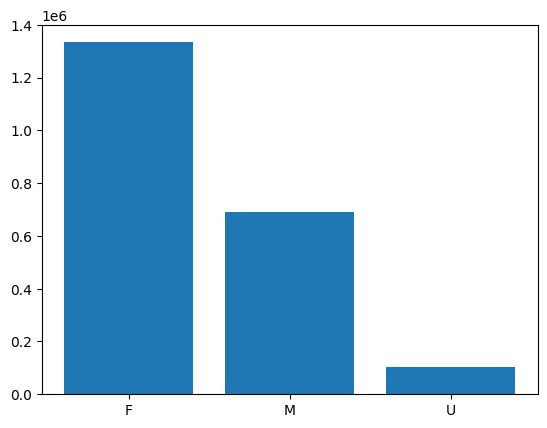

In [109]:
plt.bar(df['SEX'].value_counts().index, df['SEX'].value_counts().values)

In [110]:
df['SEX'].isnull().sum()

np.int64(0)

In [111]:
df.isnull().sum()

VAERS_ID                 0
STATE               290454
AGE_YRS             225228
SEX                      0
SYMPTOM_TEXT          2685
RECOVD              224096
VAX_DATE            159783
ONSET_DATE          194989
NUMDAYS             288567
V_ADMINBY                0
HISTORY            1009385
FORM_VERS                0
ALLERGIES          1243977
ORDER                    0
ORDER                    0
SYMPTOM1                 0
SYMPTOM2            482251
SYMPTOMVERSION2     482251
SYMPTOM3            886248
SYMPTOMVERSION3     886248
VAX_TYPE                 0
VAX_MANU                 0
VAX_LOT             596810
VAX_DOSE_SERIES      23362
VAX_ROUTE           568186
VAX_SITE            632236
VAX_NAME                 0
dtype: int64

In [112]:
df.shape

(2127213, 27)

In [114]:
fuu = df['SYMPTOM_TEXT'].unique().tolist()

In [115]:
len(fuu)

1135046